In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
houses = pd.read_csv('data/train.csv')

In [3]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# EDA

In [4]:
houses.shape

(1460, 81)

In [5]:
houses.isnull().sum().sum()

6965

In [6]:
houses.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

#### MSSubClass (type of building)

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [7]:
## no missing values here
houses['MSSubClass'].isnull().sum()

0

In [8]:
houses['MSSubClass'].value_counts().sort_values()

40       4
180     10
45      12
75      16
85      20
190     30
90      52
80      58
70      60
160     63
30      69
120     87
50     144
60     299
20     536
Name: MSSubClass, dtype: int64

#### MSZoning

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [9]:
## no industrial zoned houses
## no agricultural
## no residential low density park

houses['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [10]:
list(set(houses['MSZoning']))

['RL', 'RM', 'RH', 'FV', 'C (all)']

#### Lot Frontage

In [11]:
## 259 rows without lot frontage or without lot frontage data
## these are either missing data or they just don't have connected street (maybe they're apartments?)
houses['LotFrontage'].isnull().sum()

259

In [12]:
no_frontage = houses[houses['LotFrontage'].isnull()==True]

In [13]:
## zoning types for sales without lot frontage data present
no_frontage['MSZoning'].value_counts()

RL    229
RM     19
FV      8
RH      3
Name: MSZoning, dtype: int64

In [14]:
## house type for sales without lot frontage data
no_frontage['MSSubClass'].value_counts()

20     99
60     69
120    20
80     20
50     16
160     8
85      6
30      6
90      5
70      5
190     3
75      1
40      1
Name: MSSubClass, dtype: int64

(array([ 205.,  643.,  298.,   40.,    9.,    4.,    0.,    0.,    0.,    2.]),
 array([  21. ,   50.2,   79.4,  108.6,  137.8,  167. ,  196.2,  225.4,
         254.6,  283.8,  313. ]),
 <a list of 10 Patch objects>)

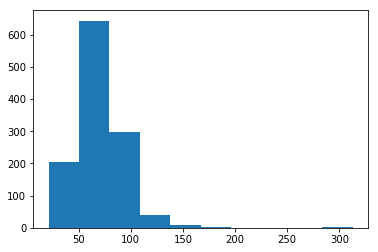

In [15]:
## histogram of linear feet of street connected to property
plt.hist(houses['LotFrontage'].dropna())

#### LotArea (lot size in square feet)

actual numerical data

(array([ 506.,  840.,   77.,   14.,    8.,    2.,    3.,    4.,    1.,
           1.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    0.,    2.,    0.,    0.,    0.,    0.,
           0.,    0.,    1.]),
 array([   1300. ,    8431.5,   15563. ,   22694.5,   29826. ,   36957.5,
          44089. ,   51220.5,   58352. ,   65483.5,   72615. ,   79746.5,
          86878. ,   94009.5,  101141. ,  108272.5,  115404. ,  122535.5,
         129667. ,  136798.5,  143930. ,  151061.5,  158193. ,  165324.5,
         172456. ,  179587.5,  186719. ,  193850.5,  200982. ,  208113.5,
         215245. ]),
 <a list of 30 Patch objects>)

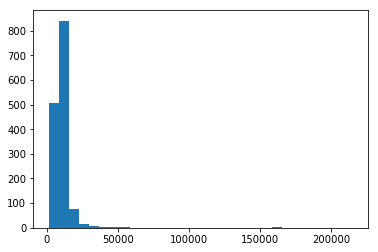

In [16]:
plt.hist(houses['LotArea'], bins=30)

(array([  31.,   48.,  131.,  640.,  528.,   58.,   12.,    8.,    1.,    3.]),
 array([  7.17011954,   7.68106081,   8.19200207,   8.70294334,
          9.2138846 ,   9.72482587,  10.23576713,  10.7467084 ,
         11.25764966,  11.76859093,  12.27953219]),
 <a list of 10 Patch objects>)

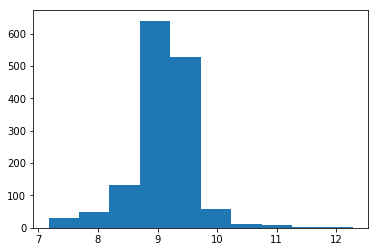

In [17]:
## log transform may be better than raw data
plt.hist(np.log(houses['LotArea']))

In [18]:
houses['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [19]:
## could leave as-is or log-transform

#### Street (paved or gravel road attached to lot)

In [20]:
houses['Street'].isnull().sum()

0

In [21]:
## There are so few gravel streets that it might be better just to leave this one out
houses['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

#### Alley (type of alley access to property)

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [22]:
houses['Alley'].isnull().sum()

1369

In [23]:
houses['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

### LotShape (general shape of property)

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [24]:
## All basically regular shapes. Should probably group all irregular together. 
## option 1: group all irregular together
## option 2: group IR2 and IR3 together, and leave Reg and IR1 as is
houses['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

#### LandContour (land flatness)

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [25]:
## maybe group together all non-level properties

houses['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [26]:
houses['LandContour'].isnull().sum()

0

#### Utilities

       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	

In [27]:
## nothing to see here

houses['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [28]:
houses['Utilities'].isnull().sum()

0

#### LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

In [29]:
## maybe group FR2 and FR3

houses['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [30]:
houses['LotConfig'].isnull().sum()

0

#### LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

In [31]:
houses['LandSlope'].isnull().sum()

0

In [32]:
## group all slopes?

houses['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

#### Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

In [33]:
houses['Neighborhood'].isnull().sum()

0

In [34]:
## I could dummy all of these, or just the ones above 40 or 50

houses['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

#### Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [35]:
houses['Condition1'].isnull().sum()

0

In [36]:
## I can combine all of the railroad conditions (45 total)
## keep norm, Feedr and Artery as is?
## code HasNegFeatures (if it has any negative feature)
## code HasPosFeatures (if it has any positive features)

houses['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

#### Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [37]:
## this refers to so few houses that it's probably not worth using

houses['Condition2'].value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

In [38]:
houses['Condition2'].isnull().sum()

0

#### BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

In [39]:
houses['BldgType'].isnull().sum()

0

In [40]:
## looks like I can just dummy these out?

houses['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

#### HouseStyle: Style of dwelling
	
   
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

In [41]:
houses['HouseStyle'].isnull().sum()

0

In [42]:
## can definitely keep 1Story, 2Story and 1.5Fin. The rest are marginal.

houses['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

#### OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [43]:
## can keep this as-is (numeric)

In [44]:
houses['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

(array([   2.,    3.,   20.,  116.,  397.,  374.,  319.,  168.,   43.,   18.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

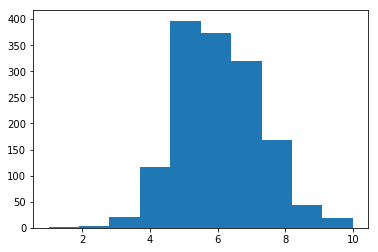

In [45]:
plt.hist(houses['OverallQual'])

#### OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

(array([   1.,    5.,   25.,   57.,    0.,  821.,  252.,  205.,   72.,   22.]),
 array([ 1. ,  1.8,  2.6,  3.4,  4.2,  5. ,  5.8,  6.6,  7.4,  8.2,  9. ]),
 <a list of 10 Patch objects>)

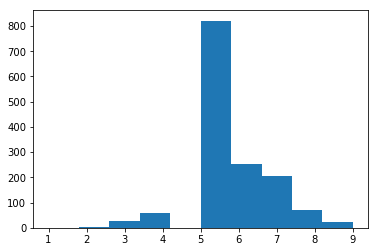

In [46]:
plt.hist(houses['OverallCond'])

In [47]:
## pretty surprising that these don't correlate
houses[['OverallCond', 'OverallQual']].corr()

,OverallCond,OverallQual
OverallCond,1.000000,-0.091932
OverallQual,-0.091932,1.000000


#### YearBuilt: Original construction date

(array([   9.,    6.,   37.,  122.,   83.,  128.,  261.,  223.,  139.,  452.]),
 array([ 1872. ,  1885.8,  1899.6,  1913.4,  1927.2,  1941. ,  1954.8,
         1968.6,  1982.4,  1996.2,  2010. ]),
 <a list of 10 Patch objects>)

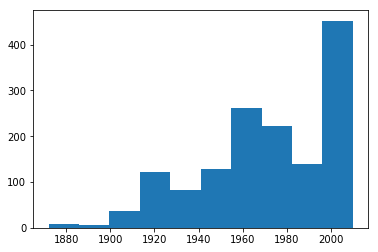

In [52]:
## maybe combine this with year mod and year sold?
plt.hist(houses['YearBuilt'])

#### YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)


(array([ 220.,   72.,   84.,  106.,   98.,   48.,   64.,  150.,  241.,  377.]),
 array([ 1950.,  1956.,  1962.,  1968.,  1974.,  1980.,  1986.,  1992.,
         1998.,  2004.,  2010.]),
 <a list of 10 Patch objects>)

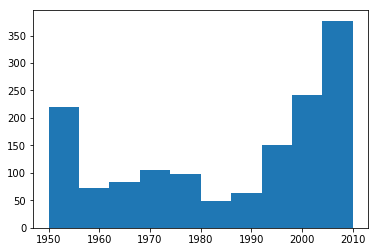

In [51]:
plt.hist(houses['YearRemodAdd'])

#### RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

In [54]:
## keep gable and hip

houses['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

#### RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

In [56]:
## there's nothing useable here

houses['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Metal         1
ClyTile       1
Roll          1
Name: RoofMatl, dtype: int64

#### Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [58]:
## can keep everything above CemntBd or BrkFace
houses['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

#### Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [59]:
houses['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

#### MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

In [63]:
houses['MasVnrType'].isnull().sum()

8

In [61]:
## can use none, brkface, stone
houses['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

#### MasVnrArea: Masonry veneer area in square feet


(array([  1.07700000e+03,   2.19000000e+02,   9.40000000e+01,
          2.90000000e+01,   1.90000000e+01,   6.00000000e+00,
          4.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([    0.,   160.,   320.,   480.,   640.,   800.,   960.,  1120.,
         1280.,  1440.,  1600.]),
 <a list of 10 Patch objects>)

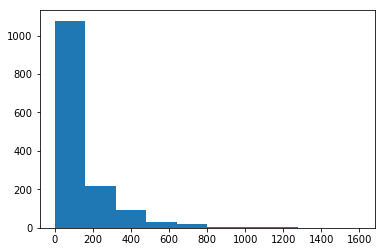

In [68]:
plt.hist(houses['MasVnrArea'].dropna())

In [71]:
houses['logMasVnrArea'] = houses['MasVnrArea'].apply(lambda x: x if x==0 else np.log(x))

(array([ 863.,    0.,    0.,   11.,   11.,   64.,  162.,  228.,   94.,   19.]),
 array([ 0.        ,  0.73777589,  1.47555178,  2.21332767,  2.95110356,
         3.68887945,  4.42665534,  5.16443124,  5.90220713,  6.63998302,
         7.37775891]),
 <a list of 10 Patch objects>)

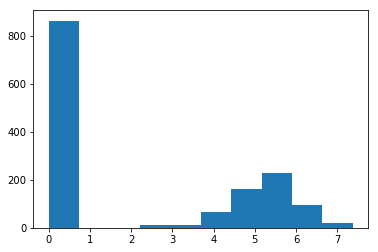

In [72]:
## this is really zero-inflated. 
plt.hist(houses['logMasVnrArea'].dropna())

#### ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [75]:
# Can keep TA and Gd. Maybe combine Ex anf Fa?
houses['ExterQual'].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [74]:
houses['ExterQual'].isnull().sum()

0

#### ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [77]:
## can keep TA and Gd
houses['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

#### Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

In [78]:
houses['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

#### BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [80]:
## can use everything except Fa
houses['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

#### BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [83]:
## can keep TA and combine the rest

houses['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

#### BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [85]:
## these all look good

houses['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

#### BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [87]:
## could keep everything except LwQ

houses['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

#### BsmtFinSF1: Type 1 finished square feet

(array([ 919.,  417.,  114.,    8.,    1.,    0.,    0.,    0.,    0.,    1.]),
 array([    0. ,   564.4,  1128.8,  1693.2,  2257.6,  2822. ,  3386.4,
         3950.8,  4515.2,  5079.6,  5644. ]),
 <a list of 10 Patch objects>)

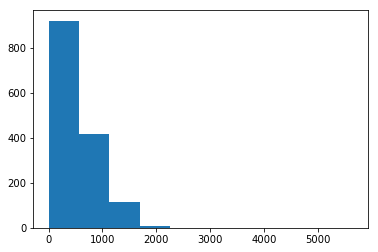

In [90]:
## zero inflated again. (467 zeroes)

plt.hist(houses['BsmtFinSF1'])

#### BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [92]:
## could use Unf and bin the rest

houses['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

#### BsmtFinSF2: Type 2 finished square feet

(array([  1.32500000e+03,   4.30000000e+01,   2.50000000e+01,
          2.80000000e+01,   1.90000000e+01,   8.00000000e+00,
          4.00000000e+00,   7.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([    0. ,   147.4,   294.8,   442.2,   589.6,   737. ,   884.4,
         1031.8,  1179.2,  1326.6,  1474. ]),
 <a list of 10 Patch objects>)

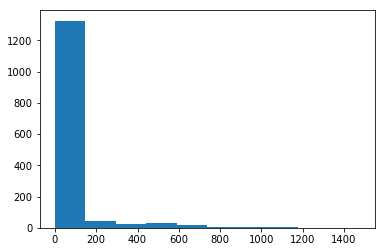

In [94]:
## hugely zero-inflated. There probably isn't anything here.

plt.hist(houses['BsmtFinSF2'])

#### BsmtUnfSF: Unfinished square feet of basement area


(array([ 375.,  346.,  256.,  216.,  106.,   72.,   53.,   24.,    9.,    3.]),
 array([    0. ,   233.6,   467.2,   700.8,   934.4,  1168. ,  1401.6,
         1635.2,  1868.8,  2102.4,  2336. ]),
 <a list of 10 Patch objects>)

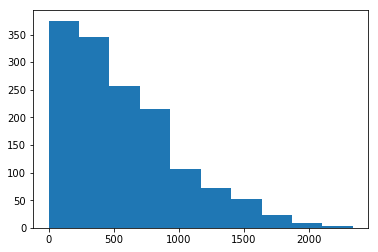

In [95]:
plt.hist(houses['BsmtUnfSF'])

In [103]:
## not that many zeroes. I could mask the 0s and log the rest?

houses['BsmtUnfSF'].value_counts().head()

0      118
728      9
384      8
572      7
600      7
Name: BsmtUnfSF, dtype: int64

#### TotalBsmtSF: Total square feet of basement area


(array([ 121.,  907.,  372.,   52.,    3.,    4.,    0.,    0.,    0.,    1.]),
 array([    0.,   611.,  1222.,  1833.,  2444.,  3055.,  3666.,  4277.,
         4888.,  5499.,  6110.]),
 <a list of 10 Patch objects>)

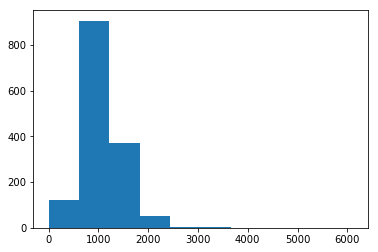

In [98]:
plt.hist(houses['TotalBsmtSF'])

In [99]:
houses['TotalBsmtSF'].value_counts().head()

0       37
864     35
672     17
912     15
1040    14
Name: TotalBsmtSF, dtype: int64

In [100]:
houses['TotalBsmtSF'].isnull().sum()

0

#### Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

In [105]:
## I don't think here's anything useful here

houses['Heating'].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

#### HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [108]:
## I can use all of these as-is except for Po and probably Fa
## Could dummy Ex and TA, and dummy the rest?

houses['HeatingQC'].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

#### CentralAir: Central air conditioning

       N	No
       Y	Yes

In [110]:
## dummy for yes
houses['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

#### Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [112]:
## SBrkr and FuseA are okay, not the rest

houses['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

#### 1stFlrSF: First Floor square feet


(array([ 165.,  735.,  385.,  147.,   21.,    4.,    2.,    0.,    0.,    1.]),
 array([  334. ,   769.8,  1205.6,  1641.4,  2077.2,  2513. ,  2948.8,
         3384.6,  3820.4,  4256.2,  4692. ]),
 <a list of 10 Patch objects>)

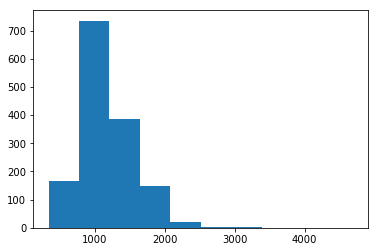

In [114]:
## looks good as-is

plt.hist(houses['1stFlrSF'])

#### 2ndFlrSF: Second floor square feet


(array([ 832.,   32.,  118.,  209.,  154.,   69.,   34.,    8.,    2.,    2.]),
 array([    0. ,   206.5,   413. ,   619.5,   826. ,  1032.5,  1239. ,
         1445.5,  1652. ,  1858.5,  2065. ]),
 <a list of 10 Patch objects>)

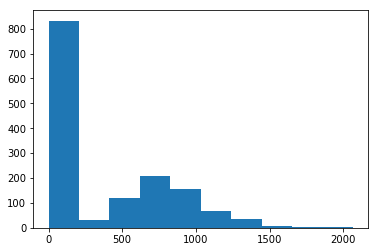

In [116]:
## seriously zero-inflated

plt.hist(houses['2ndFlrSF'])

#### LowQualFinSF: Low quality finished square feet (all floors)


(array([  1.43500000e+03,   3.00000000e+00,   3.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          7.00000000e+00,   1.00000000e+00,   5.00000000e+00,
          3.00000000e+00]),
 array([   0. ,   57.2,  114.4,  171.6,  228.8,  286. ,  343.2,  400.4,
         457.6,  514.8,  572. ]),
 <a list of 10 Patch objects>)

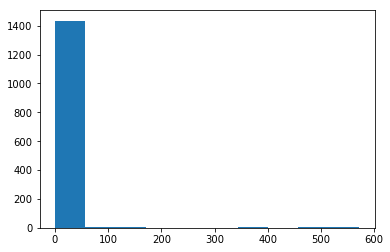

In [118]:
## nothing to see here

plt.hist(houses['LowQualFinSF'])

#### GrLivArea: Above grade (ground) living area square feet


(array([ 107.,  554.,  535.,  189.,   57.,   12.,    2.,    2.,    1.,    1.]),
 array([  334. ,   864.8,  1395.6,  1926.4,  2457.2,  2988. ,  3518.8,
         4049.6,  4580.4,  5111.2,  5642. ]),
 <a list of 10 Patch objects>)

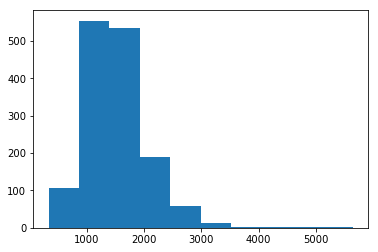

In [120]:
## this looks good as-is

plt.hist(houses['GrLivArea'])

#### BsmtFullBath: Basement full bathrooms


In [122]:
## maybe dummy for has-full-bathroom-in-basement

houses['BsmtFullBath'].value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

#### BsmtHalfBath: Basement half bathrooms


In [124]:
## maybe have a dummy for has-half-bathroom-in-basement

houses['BsmtHalfBath'].value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

#### FullBath: Full bathrooms above grade


In [128]:
## divide into 1 and 2+

houses['FullBath'].value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

#### HalfBath: Half baths above grade


In [127]:
## divide into zero and 1+

houses['HalfBath'].value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

#### BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)


In [135]:
## could do 2 and under and 3+

houses['BedroomAbvGr'].value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

#### Kitchen: Kitchens above grade


In [138]:
## probably nothing to see here

houses['KitchenAbvGr'].value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

#### KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

In [140]:
## make 1 dummy for above average (gd and ex)

houses['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

#### TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)


In [141]:
houses['TotRmsAbvGrd'].value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

(array([  18.,   97.,  275.,  402.,  329.,  262.,   47.,   18.,   11.,    1.]),
 array([  2. ,   3.2,   4.4,   5.6,   6.8,   8. ,   9.2,  10.4,  11.6,
         12.8,  14. ]),
 <a list of 10 Patch objects>)

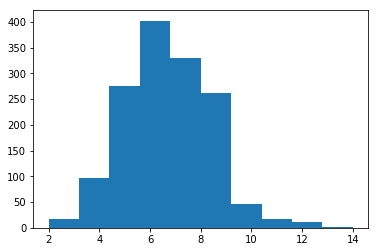

In [143]:
## could use this as-is

plt.hist(houses['TotRmsAbvGrd'])

#### Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

In [145]:
## 1 dummy for below-average

houses['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

#### Fireplaces: Number of fireplaces


In [147]:
## no fireplace, 1+ fireplace

houses['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

#### FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [148]:
houses['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [149]:
houses['FireplaceQu'].isnull().sum()

690

#### GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

In [150]:
houses['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [151]:
houses['GarageType'].isnull().sum()

81

#### GarageYrBlt: Year garage was built


In [154]:
houses['GarageYrBlt'].isnull().sum()

81

(array([   6.,   28.,   49.,   52.,   93.,  195.,  194.,  140.,  190.,  432.]),
 array([ 1900.,  1911.,  1922.,  1933.,  1944.,  1955.,  1966.,  1977.,
         1988.,  1999.,  2010.]),
 <a list of 10 Patch objects>)

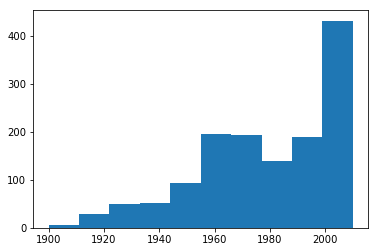

In [153]:
plt.hist(houses['GarageYrBlt'].dropna())

#### GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [156]:
## can dummy all of these

houses['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

#### GarageCars: Size of garage in car capacity


In [157]:
houses['GarageCars'].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

(array([  81.,    0.,  369.,    0.,    0.,  824.,    0.,  181.,    0.,    5.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

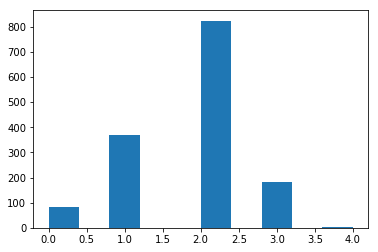

In [162]:
## could leave as-is
plt.hist(houses['GarageCars'])

#### GarageArea: Size of garage in square feet


(array([  81.,  167.,  293.,  500.,  240.,  106.,   57.,   10.,    3.,    3.]),
 array([    0. ,   141.8,   283.6,   425.4,   567.2,   709. ,   850.8,
          992.6,  1134.4,  1276.2,  1418. ]),
 <a list of 10 Patch objects>)

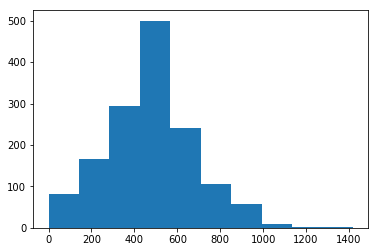

In [161]:
## could leave as-is
plt.hist(houses['GarageArea'])

#### GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [163]:
houses['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

#### GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [166]:
## nothing to see here
houses['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

#### PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

In [168]:
## one dummy for paved
houses['PavedDrive'].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

#### WoodDeckSF: Wood deck area in square feet


(array([ 826.,  286.,  198.,   82.,   38.,   17.,    7.,    3.,    2.,    1.]),
 array([   0. ,   85.7,  171.4,  257.1,  342.8,  428.5,  514.2,  599.9,
         685.6,  771.3,  857. ]),
 <a list of 10 Patch objects>)

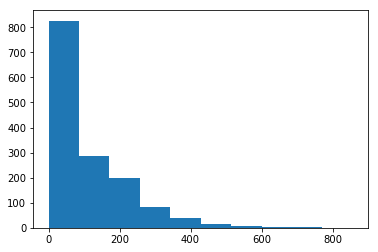

In [170]:
## hugely zero-inflated

plt.hist(houses['WoodDeckSF'])

#### OpenPorchSF: Open porch area in square feet


(array([ 1007.,   242.,   123.,    45.,    25.,    11.,     2.,     2.,
            0.,     3.]),
 array([   0. ,   54.7,  109.4,  164.1,  218.8,  273.5,  328.2,  382.9,
         437.6,  492.3,  547. ]),
 <a list of 10 Patch objects>)

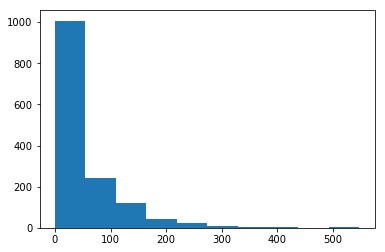

In [173]:
## zero-inflated. maybe just a dummy for has-open-porch
plt.hist(houses['OpenPorchSF'])

#### EnclosedPorch: Enclosed porch area in square feet


(array([  1.27400000e+03,   3.30000000e+01,   6.80000000e+01,
          4.50000000e+01,   3.00000000e+01,   8.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([   0. ,   55.2,  110.4,  165.6,  220.8,  276. ,  331.2,  386.4,
         441.6,  496.8,  552. ]),
 <a list of 10 Patch objects>)

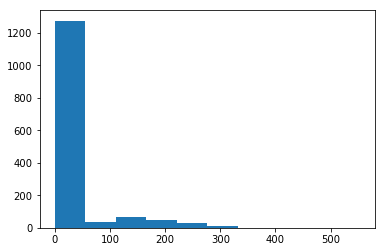

In [175]:
## maybe just one dummy for enclosed porch
plt.hist(houses['EnclosedPorch'])

#### 3SsnPorch: Three season porch area in square feet


(array([  1.43700000e+03,   1.00000000e+00,   4.00000000e+00,
          9.00000000e+00,   4.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([   0. ,   50.8,  101.6,  152.4,  203.2,  254. ,  304.8,  355.6,
         406.4,  457.2,  508. ]),
 <a list of 10 Patch objects>)

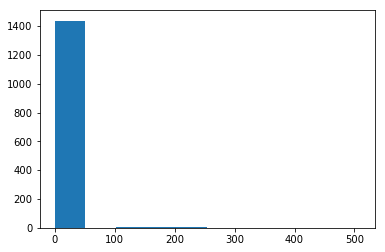

In [177]:
plt.hist(houses['3SsnPorch'])

In [179]:
## nothing to see here

houses['3SsnPorch'].value_counts()

0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

#### ScreenPorch: Screen porch area in square feet


(array([  1.34500000e+03,   8.00000000e+00,   2.00000000e+01,
          4.00000000e+01,   2.50000000e+01,   1.10000000e+01,
          5.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          2.00000000e+00]),
 array([   0.,   48.,   96.,  144.,  192.,  240.,  288.,  336.,  384.,
         432.,  480.]),
 <a list of 10 Patch objects>)

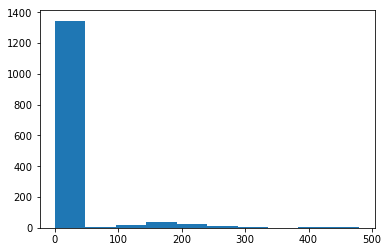

In [181]:
## maybe just a dummy for has screen porch

plt.hist(houses['ScreenPorch'])

#### PoolArea: Pool area in square feet


(array([  1.45300000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   3.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([   0. ,   73.8,  147.6,  221.4,  295.2,  369. ,  442.8,  516.6,
         590.4,  664.2,  738. ]),
 <a list of 10 Patch objects>)

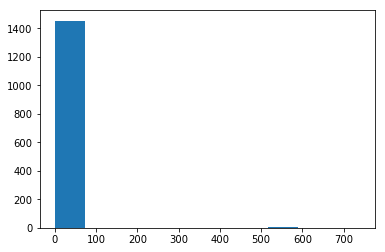

In [183]:
## nothing to see here
plt.hist(houses['PoolArea'])

#### PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [185]:
## nothing to see here
houses['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

#### Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

In [186]:
houses['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

#### MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [189]:
## could maybe get 1 dummy out of misc feature

houses['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [188]:
houses['MiscFeature'].isnull().sum()

1406

#### MiscVal: $Value of miscellaneous feature


(array([  1.45200000e+03,   5.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([     0.,   1550.,   3100.,   4650.,   6200.,   7750.,   9300.,
         10850.,  12400.,  13950.,  15500.]),
 <a list of 10 Patch objects>)

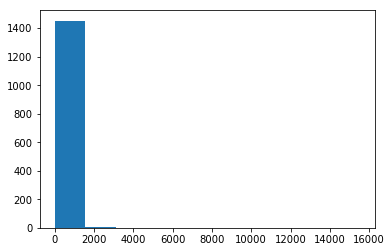

In [190]:
plt.hist(houses['MiscVal'])

In [192]:
## nothing here

houses['MiscVal'].value_counts()

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

#### MoSold: Month Sold (MM)


(array([ 110.,  106.,  141.,  204.,  253.,  234.,  122.,   63.,   89.,  138.]),
 array([  1. ,   2.1,   3.2,   4.3,   5.4,   6.5,   7.6,   8.7,   9.8,
         10.9,  12. ]),
 <a list of 10 Patch objects>)

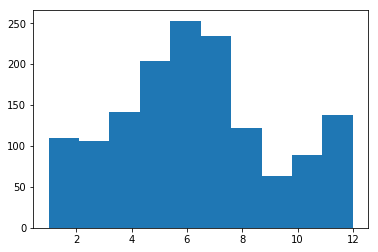

In [196]:
## could probably leave this as-is, but making dummies may be better

plt.hist(houses['MoSold'])

#### YrSold: Year Sold (YYYY)


(array([ 314.,    0.,  329.,    0.,    0.,  304.,    0.,  338.,    0.,  175.]),
 array([ 2006. ,  2006.4,  2006.8,  2007.2,  2007.6,  2008. ,  2008.4,
         2008.8,  2009.2,  2009.6,  2010. ]),
 <a list of 10 Patch objects>)

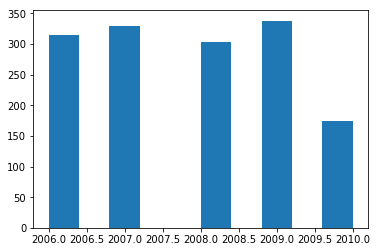

In [197]:
plt.hist(houses['YrSold'])

In [198]:
houses['YrSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

#### SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

In [200]:
## could dummy WD, NEW, other

houses['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

#### SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


In [202]:
## could dummy normal, partial, abnormal

houses['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

# Feature Creation

In [48]:
## house type dummy variables (MSSubClass)
## zoning dummy variables (MSZoning)


# Modeling

In [49]:
## try linear regression, random forest, extra trees, gradient boost, adaboost